In [1]:
# prompt: import yfinance
import yfinance as yf






In [2]:
stock_data = yf.download("COST", start="2020-01-01", end="2024-12-31")
stock_data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,COST,COST,COST,COST,COST
Date,,,,,
2020-01-02,267.592499,270.429165,267.142680,269.951807,2103600
2020-01-03,267.812897,268.886960,265.609635,266.270608,1926000
2020-01-06,267.886200,268.124893,264.957727,266.729491,2655100
2020-01-07,267.464050,267.776172,265.563750,267.436511,1963400
2020-01-08,270.530182,271.255422,266.683692,267.133511,2492800
...,...,...,...,...,...
2024-12-23,948.861572,953.206808,935.965848,952.827222,1856800
2024-12-24,957.761780,958.321159,944.406541,949.690680,939000


In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))


In [4]:
scaled_data=scaler.fit_transform(stock_data['Close'].values.reshape(-1,1))

In [5]:
import numpy as np

def create_dataset(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)


In [6]:
time_step=100
X, y = create_dataset(scaled_data, time_step)

In [7]:
train_size=0.8

In [8]:
X_train, X_test = X[:int(train_size * len(X))], X[int(train_size * len(X)):]
y_train, y_test = y[:int(train_size * len(y))], y[int(train_size * len(y)):]


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

model=Sequential()

model.add(Input(shape=(time_step,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(50))
model.add(Dense(1))

In [10]:
# Press the button to the left if this is taking too long to run.
# It will stop this from running.
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=10, batch_size=64)



Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 0.0415
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 0.0052
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - loss: 0.0019
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - loss: 6.9803e-04
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - loss: 5.5172e-04
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 5.1065e-04
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 4.6910e-04
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 5.0436e-04
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 4.7374e-04
Epoch 10/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - loss: 4.9423e-04


In [11]:
test_loss = model.evaluate(X_test, y_test)
test_loss

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 8.7535e-04


0.0011023615952581167

In [12]:
predictions = model.predict(X_test)
predictions=scaler.inverse_transform(predictions)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step


In [13]:
original_data=stock_data['Close'].values
predicted_data=np.empty_like(original_data)
predicted_data[:]=np.nan
predicted_data[-len(predictions):]=predictions.reshape(-1,1)


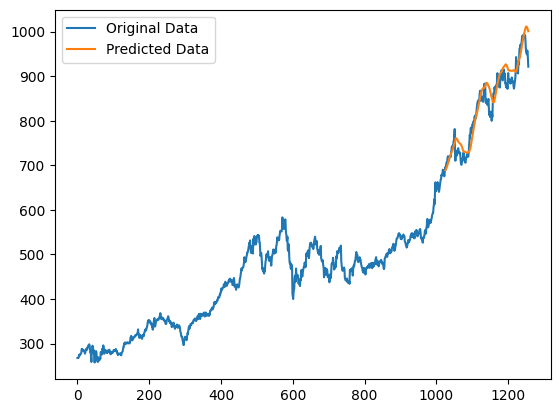

In [14]:
import matplotlib.pyplot as plt
plt.plot(original_data, label='Original Data')
plt.plot(predicted_data, label='Predicted Data')
plt.legend()
plt.show()


In [15]:
new_predictions=model.predict(X_test[-90:])
new_predictions=scaler.inverse_transform(new_predictions)
predicted_data=np.append(predicted_data, new_predictions)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


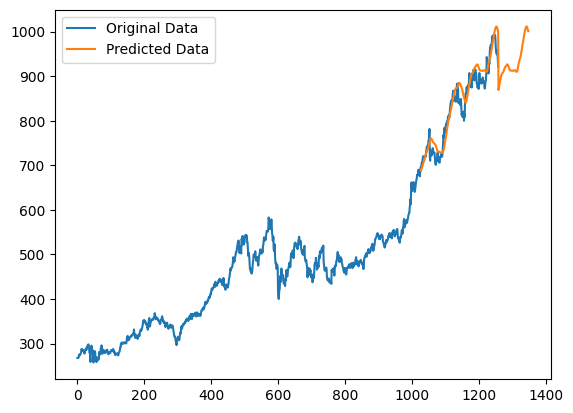

In [16]:
plt.plot(original_data, label='Original Data')
plt.plot(predicted_data, label='Predicted Data')
plt.legend()
plt.show()